In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [6]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [7]:
df['target'] = data.target

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.shape

(150, 5)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(df[data.feature_names],df['target'],random_state=0,test_size=0.25)

In [14]:
X_train.shape

(112, 4)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
clf = DecisionTreeClassifier(max_depth=2,random_state=0)

In [17]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [18]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2])

In [19]:
score = clf.score(X_test,y_test)
print(score)

0.8947368421052632


In [20]:
max_depth_range = list(range(1,6))

accuracy = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth,random_state=0)
    
    clf.fit(X_train,y_train)
    
    score = clf.score(X_test,y_test)
    
    accuracy.append(score)

In [21]:
accuracy

[0.5789473684210527,
 0.8947368421052632,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158]

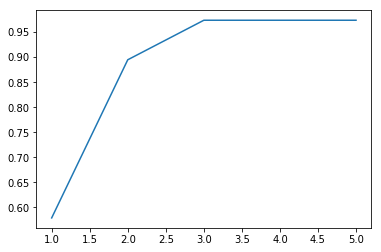

In [23]:
plt.plot(max_depth_range,accuracy)

In [27]:
from sklearn.metrics import confusion_matrix,classification_report

y_pred  = clf.predict(X_test)

print("predicted values : ")

print(y_pred)

print("Confusion Matrix : ")

confusion_matrix(y_test,y_pred)


predicted values : 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Confusion Matrix : 


array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)